### TO-DOS:
-hyperparameters without config file

-automatically one-hot encode categoric variables

-dilated RNN

-current arquitecure is optimized for quarterly data (from M4), include all the arquitectures

-max_series_length as hyper-parameter

### Extremely important parameters (not yet optimized):
- learning rate
- epochs (affects wiggliness, loss always decrease reducing wiggliness through variability loss)
- seasonality (the input of the RNN is one season)
- input size
- level_variability_penalty (relative importance between forecast and wiggliness)
- dilations: currently the length of this list controls the num of hidden layers

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from esrnn import ESRNN
plt.style.use('ggplot')

In [2]:
# Plot
def plot_prediction(y, y_hat):
    n_y = len(y)
    n_yhat = len(y_hat)
    ds_y = np.array(range(n_y))
    ds_yhat = np.array(range(n_y, n_y+n_yhat))

    plt.plot(ds_y, y, label = 'y')
    plt.plot(ds_yhat, y_hat, label='y_hat')
    plt.legend(loc='upper left')
    plt.show()

In [3]:
# Original stock data
data = pd.read_csv('train.csv')
data['Date'] = data['Year'].astype(str)+'-'+data['Date'].astype(str)
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Company','Year','Date','Close']]
data.head()

,Company,Year,Date,Close
0,abbv,2013,2013-01-04,28.810
1,abbv,2013,2013-01-07,28.869
2,abbv,2013,2013-01-08,28.242
3,abbv,2013,2013-01-09,28.399
4,abbv,2013,2013-01-10,28.481


In [4]:
# Clean data (model assumes this name columns)
data['unique_id'] = data['Company']+"_"+data['Year'].astype(str)
data = data.rename(columns={'Date':'ds', 'Close':'y'})
data = data[['unique_id','ds','y']]
data.head()

,unique_id,ds,y
0,abbv_2013,2013-01-04,28.810
1,abbv_2013,2013-01-07,28.869
2,abbv_2013,2013-01-08,28.242
3,abbv_2013,2013-01-09,28.399
4,abbv_2013,2013-01-10,28.481


In [5]:
esrnn = ESRNN() #hyperpars are specified in a .yaml file

In [6]:
esrnn.fit(data)

========== Training esrnn ==========
========= Epoch 0 finished =========
Training time: 4.244779109954834
Forecast loss: 1.4770020246505737
========= Epoch 1 finished =========
Training time: 4.048706769943237
Forecast loss: 1.47347891330719
========= Epoch 2 finished =========
Training time: 4.052459955215454
Forecast loss: 1.472402572631836
========= Epoch 3 finished =========
Training time: 3.979429244995117
Forecast loss: 1.4703378677368164
========= Epoch 4 finished =========
Training time: 4.045522928237915
Forecast loss: 1.467130184173584
========= Epoch 5 finished =========
Training time: 4.004010915756226
Forecast loss: 1.4623655080795288
========= Epoch 6 finished =========
Training time: 4.004010915756226
Forecast loss: 1.4567840099334717
========= Epoch 7 finished =========
Training time: 4.029497861862183
Forecast loss: 1.450331211090088
========= Epoch 8 finished =========
Training time: 4.013527154922485
Forecast loss: 1.4427990913391113
========= Epoch 9 finished =====

========= Epoch 78 finished =========
Training time: 4.12015175819397
Forecast loss: 0.8435063362121582
========= Epoch 79 finished =========
Training time: 4.021894216537476
Forecast loss: 0.8372562527656555
========= Epoch 80 finished =========
Training time: 4.0946009159088135
Forecast loss: 0.8317903280258179
========= Epoch 81 finished =========
Training time: 4.344043970108032
Forecast loss: 0.8266245126724243
========= Epoch 82 finished =========
Training time: 4.290466070175171
Forecast loss: 0.8209888935089111
========= Epoch 83 finished =========
Training time: 4.240397214889526
Forecast loss: 0.8151460886001587
========= Epoch 84 finished =========
Training time: 4.408114910125732
Forecast loss: 0.8091468811035156
========= Epoch 85 finished =========
Training time: 4.188813209533691
Forecast loss: 0.8036678433418274
========= Epoch 86 finished =========
Training time: 4.027080059051514
Forecast loss: 0.7990196943283081
========= Epoch 87 finished =========
Training time: 4.

In [7]:
predictions = esrnn.predict()

In [8]:
predictions.head()

,unique_id,ds,y_hat
0,abbv_2013,2013-11-01,45.828186
1,abbv_2013,2013-11-02,45.317749
2,abbv_2013,2013-11-03,45.024433
3,abbv_2013,2013-11-04,44.216354
4,abbv_2013,2013-11-05,44.057407


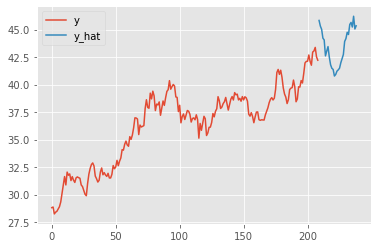

In [13]:
# Prediction examples
id_plot = esrnn.unique_ids[0]
plot_prediction(data[data['unique_id']==id_plot].y, predictions[predictions['unique_id']==id_plot].y_hat)

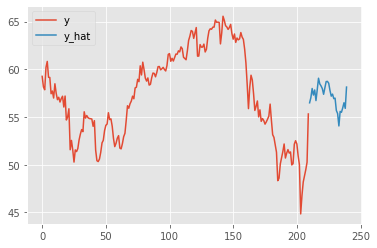

In [21]:
id_plot = esrnn.unique_ids[2]
plot_prediction(data[data['unique_id']==id_plot].y, predictions[predictions['unique_id']==id_plot].y_hat)

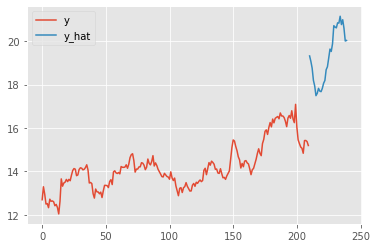

In [10]:
id_plot = esrnn.unique_ids[50]
plot_prediction(data[data['unique_id']==id_plot].y, predictions[predictions['unique_id']==id_plot].y_hat)

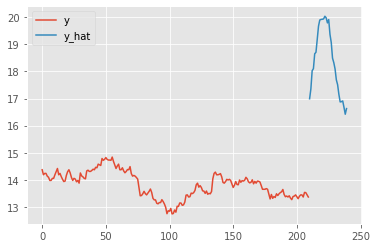

In [22]:
id_plot = esrnn.unique_ids[100] #Example of a terrible prediction
plot_prediction(data[data['unique_id']==id_plot].y, predictions[predictions['unique_id']==id_plot].y_hat)

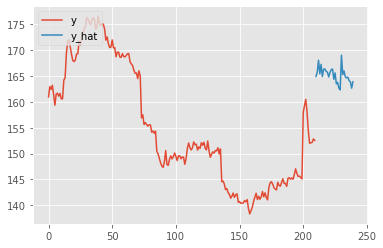

In [23]:
id_plot = esrnn.unique_ids[140]
plot_prediction(data[data['unique_id']==id_plot].y, predictions[predictions['unique_id']==id_plot].y_hat)